In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
data = pd.read_csv('feature_matrix_wpt8.csv')

In [3]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,Status
0,0,755098.844297,32377.390158,625.731673,1931.027467,421.751580,380.141275,442.372493,484.972989,stable
1,1,831683.901430,29011.091262,863.279587,1835.594656,307.304260,343.268007,432.625663,382.840166,stable
2,2,663475.388321,16025.929768,631.771612,1605.434712,348.666856,438.108110,350.250748,436.015551,stable
3,3,625635.744572,18766.645086,444.307103,1023.725925,428.968524,366.537116,301.793212,427.229202,stable
4,4,693645.190262,13989.774507,623.942054,1632.583476,440.897150,355.007638,472.713992,408.486105,stable


In [4]:
data = data.drop(['Unnamed: 0'],axis=1)
#data = data.drop(['Unnamed: 0','RMS'],axis=1)
#data = data.drop(['Unnamed: 0','RMS','Peak-to-Peak'],axis=1)

In [5]:
data

,0,1,2,3,4,5,6,7,Status
0,7.550988e+05,3.237739e+04,6.257317e+02,1.931027e+03,421.751580,380.141275,4.423725e+02,484.972989,stable
1,8.316839e+05,2.901109e+04,8.632796e+02,1.835595e+03,307.304260,343.268007,4.326257e+02,382.840166,stable
2,6.634754e+05,1.602593e+04,6.317716e+02,1.605435e+03,348.666856,438.108110,3.502507e+02,436.015551,stable
3,6.256357e+05,1.876665e+04,4.443071e+02,1.023726e+03,428.968524,366.537116,3.017932e+02,427.229202,stable
4,6.936452e+05,1.398977e+04,6.239421e+02,1.632583e+03,440.897150,355.007638,4.727140e+02,408.486105,stable
...,...,...,...,...,...,...,...,...,...
335,6.686846e+09,7.047190e+08,2.156604e+06,1.165977e+08,105726.096356,170258.394887,1.696266e+06,213327.195453,unstable
336,6.960070e+09,6.396076e+08,2.572235e+06,9.847433e+07,156942.973410,206133.006572,1.758506e+06,267671.503703,unstable
337,6.884604e+09,6.336618e+08,2.735507e+06,8.729395e+07,127728.059040,146671.733146,1.846611e+06,235678.529255,unstable
338,6.975622e+09,6.708821e+08,2.573093e+06,9.662983e+07,156502.949774,197772.807374,1.826750e+06,230405.371466,unstable


In [6]:
data['Status'] = pd.Categorical(data['Status'])

In [7]:
data['Status'].value_counts()

transition    160
stable        120
unstable       60
Name: Status, dtype: int64

In [8]:
train, test = train_test_split(data, test_size = None, shuffle = True,
                                                    random_state = 500)

In [9]:
train.shape

(255, 9)

In [10]:
test.shape

(85, 9)

In [11]:
scaler = StandardScaler()
train_scaled= scaler.fit_transform(train.iloc[:,:-1])
test_scaled = (test.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)

In [12]:
mean_scaler = scaler.mean_
std_scaler = np.sqrt(scaler.var_)

In [13]:
mean_scaler

array([2.19852182e+09, 1.76059770e+08, 6.18181401e+05, 2.37965404e+07,
       2.82191007e+04, 4.87939897e+04, 4.11935680e+05, 5.74221588e+04])

In [14]:
std_scaler

array([2.38895913e+09, 2.21378556e+08, 8.41196980e+05, 3.27092192e+07,
       4.08928783e+04, 5.77347950e+04, 5.66967440e+05, 7.86067827e+04])

In [15]:
type(mean_scaler)

numpy.ndarray

In [16]:
train_scaled[1]


array([-0.8933399 , -0.77757425, -0.72479401, -0.72030551, -0.67623575,
       -0.82828709, -0.7212364 , -0.71581604])

In [17]:
test.iloc[:,:-1]

,0,1,2,3,4,5,6,7
190,1.544984e+09,1.127786e+08,4.269248e+05,1.435354e+07,7752.824864,39452.065497,1.606193e+05,18085.553778
118,3.583017e+07,1.491537e+06,3.799757e+03,9.975754e+04,576.613235,698.171108,1.795127e+03,990.476776
133,5.434293e+08,3.379733e+07,6.924799e+04,3.482347e+06,2219.974079,8936.853833,4.145317e+04,8715.451175
214,2.522025e+09,1.330707e+08,4.761275e+05,1.493473e+07,19289.964188,40720.612978,2.721276e+05,39799.554831
105,3.288369e+07,1.292273e+06,3.480654e+03,1.186503e+05,565.767160,934.059881,2.620681e+03,1085.398306
...,...,...,...,...,...,...,...,...
140,5.221330e+08,3.951681e+07,1.148444e+05,4.328410e+06,3964.398110,9245.992193,6.460439e+04,11090.716976
134,5.906141e+08,4.057194e+07,7.327573e+04,3.761057e+06,2334.568504,6915.535577,3.465053e+04,8250.173726
292,5.226262e+09,5.480382e+08,1.990183e+06,8.756478e+07,72454.224045,118999.006822,1.512059e+06,144440.015779
243,3.951654e+09,2.548528e+08,1.062215e+06,2.752507e+07,40845.242611,74025.549917,5.474605e+05,65550.800637


## Training Logistic Regression

In [18]:
logistic_clf = LogisticRegression(C = 100, max_iter = 500, n_jobs = -1)

In [19]:
logistic_clf.fit(train_scaled, train['Status'])


LogisticRegression(C=100, max_iter=500, n_jobs=-1)

In [20]:
train_predictions = logistic_clf.predict(train_scaled)
test_predictions = logistic_clf.predict(test_scaled)

### Confusion Matrices

In [21]:
train_confusion_matrix = confusion_matrix(train['Status'], train_predictions)
test_confusion_matrix = confusion_matrix(test['Status'], test_predictions)


### Acuracy Calculation

In [22]:
train_accuracy = accuracy_score(train['Status'], train_predictions)
print("Ovearll training accuracy: ", train_accuracy)

Ovearll training accuracy:  0.984313725490196


In [23]:

test_accuracy = accuracy_score(test['Status'], test_predictions)
print("Ovearll testing accuracy: ", test_accuracy)

Ovearll testing accuracy:  0.9764705882352941


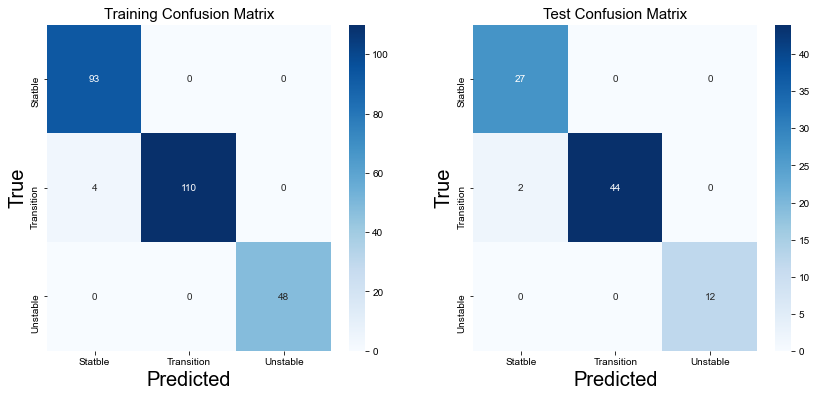

In [24]:

status_of_signal = ['Statble','Transition','Unstable']
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.heatmap(train_confusion_matrix, annot= True,fmt = "d",
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Training Confusion Matrix',size  = 15)
plt.xlabel('Predicted',size  = 20)
plt.ylabel('True',size  = 20)

plt.subplot(122)
sns.heatmap(test_confusion_matrix, annot = True,
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Test Confusion Matrix',size  = 15)
plt.xlabel('Predicted',size  = 20)
plt.ylabel('True',size  = 20)
#plt.savefig('confusion_lr_wpt8.jpg', dpi = 400)
sns.set(font_scale = 1.5)
plt.show()

## Training decision tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [26]:
dt = DecisionTreeClassifier(max_depth=2)

In [27]:
dt.fit(train_scaled, train['Status'])

DecisionTreeClassifier(max_depth=2)

In [28]:
train_predict = dt.predict(train_scaled)
test_predict = dt.predict(test_scaled)

In [29]:
train_confusion = confusion_matrix(train['Status'], train_predict)
test_confusion = confusion_matrix(test['Status'], test_predict)


In [30]:
train_accu = accuracy_score(train['Status'], train_predict)
print("Ovearll training accuracy: ", train_accu)

test_accu = accuracy_score(test['Status'], test_predict)
print("Ovearll testing accuracy: ", test_accu)

Ovearll training accuracy:  0.996078431372549
Ovearll testing accuracy:  0.9764705882352941


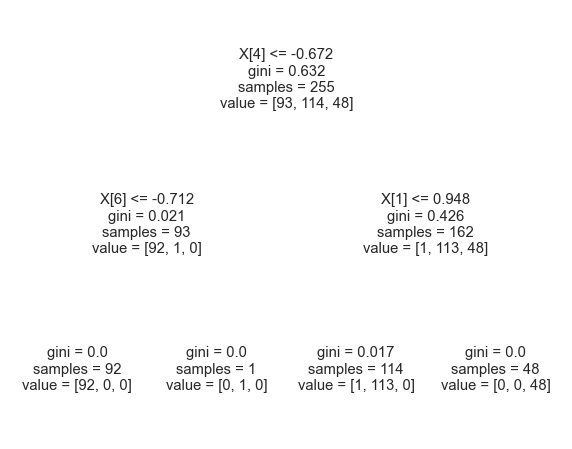

In [31]:
plt.figure(figsize = (10,8))
tree.plot_tree(dt) 
plt.show()

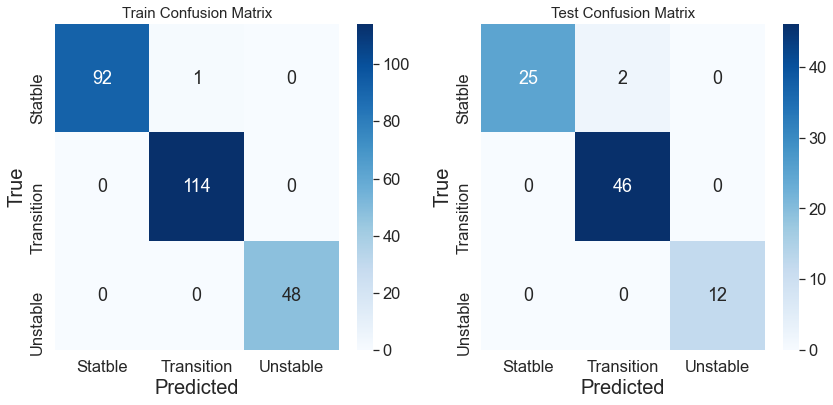

In [32]:
status_of_signal = ['Statble','Transition','Unstable']
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.heatmap(train_confusion, annot= True,fmt = "d",
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Train Confusion Matrix',size  = 15)
plt.xlabel('Predicted',size  = 20)
plt.ylabel('True',size  = 20)

plt.subplot(122)
sns.heatmap(test_confusion, annot = True,
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Test Confusion Matrix',size  = 15)
plt.xlabel('Predicted',size  = 20)
plt.ylabel('True',size  = 20)
plt.savefig('confusion_DecisionTree.jpg', dpi = 400)
plt.show()

## Training SVM

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [34]:
parameters = {"C":[1, 10, 50, 100, 300, 500],
             'gamma':[0.01, 0.05, 0.1, 0.5, 1, 5],
             'kernel':["rbf"]}

In [35]:
tuned_svm_clf = GridSearchCV(SVC(),parameters,n_jobs = -1, cv= 10)


In [36]:
tuned_svm_clf.fit(train_scaled, train['Status'])

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']})

In [37]:
tuned_svm_clf.best_score_

0.9884615384615385

In [38]:
tuned_svm_clf.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [39]:
best_clf = tuned_svm_clf.best_estimator_
best_clf

SVC(C=100, gamma=1)

In [40]:
train_predictions_svm = best_clf.predict(train_scaled)
test_predictions_svm = best_clf.predict(test_scaled)

In [41]:
train_confu_matrix_svm = confusion_matrix(train['Status'], train_predictions_svm)
test_confu_matrix_svm = confusion_matrix(test['Status'], test_predictions_svm)

In [42]:
train_accu_svm = accuracy_score(train['Status'], train_predictions_svm)
print("Ovearll training accuracy: ", train_accu_svm)

test_accu_svm = accuracy_score(test['Status'], test_predictions_svm)
print("Ovearll testing accuracy: ", test_accu_svm)

Ovearll training accuracy:  0.9882352941176471
Ovearll testing accuracy:  0.9882352941176471


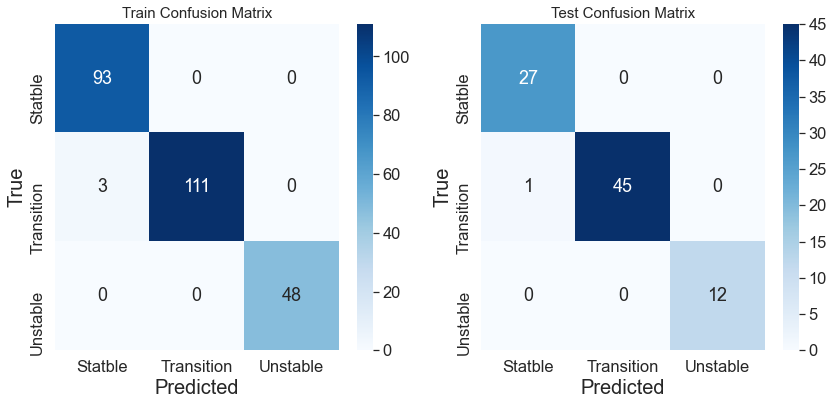

In [43]:
status_of_signal = ['Statble','Transition','Unstable']
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.heatmap(train_confu_matrix_svm, annot= True,fmt = "d",
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Train Confusion Matrix',size  = 15)
plt.xlabel('Predicted',size  = 20)
plt.ylabel('True',size  = 20)

plt.subplot(122)
sns.heatmap(test_confu_matrix_svm, annot = True,
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Test Confusion Matrix',size  = 15)
plt.xlabel('Predicted',size  = 20)
plt.ylabel('True',size  = 20)
plt.savefig('confusion_svm.jpg', dpi = 400)
plt.show()

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf_clf = RandomForestClassifier(n_estimators= 150, max_features = 8, n_jobs = -1, random_state = 892)

In [46]:
rf_clf.fit(train_scaled, train['Status'])

RandomForestClassifier(max_features=8, n_estimators=150, n_jobs=-1,
                       random_state=892)

In [47]:
train_predict_rf = rf_clf.predict(train_scaled)
test_predict_rf = rf_clf.predict(test_scaled)

In [48]:
train_confusion_rf = confusion_matrix(train['Status'], train_predict_rf)
test_confusion_rf = confusion_matrix(test['Status'], test_predict_rf)


In [49]:
train_accu_rf = accuracy_score(train['Status'], train_predict_rf )
print("Ovearll training accuracy: ", train_accu_rf)

test_accu_rf = accuracy_score(test['Status'], test_predict_rf)
print("Ovearll testing accuracy: ", test_accu_rf)

Ovearll training accuracy:  1.0
Ovearll testing accuracy:  0.9882352941176471


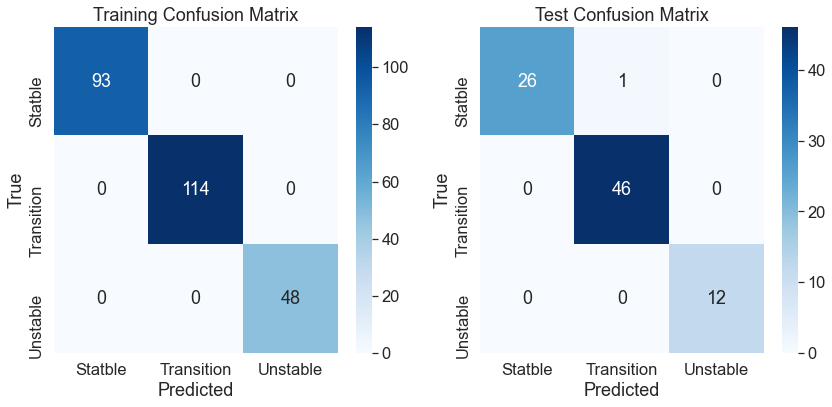

In [50]:
status_of_signal = ['Statble','Transition','Unstable']
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.heatmap(train_confusion_rf, annot= True,fmt = "d",
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(122)
sns.heatmap(test_confusion_rf, annot = True,
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_svm.jpg', dpi = 400)
plt.show()

In [51]:
with open('model_lr_wpt8','wb') as f:
    pickle.dump(logistic_clf,f)

In [52]:
with open('model_dt_wpt8','wb') as f:
    pickle.dump(dt,f)

In [53]:
with open('model_svm_wpt8','wb') as f:
    pickle.dump(best_clf,f)

In [57]:
with open('model_rf_wpt8','wb') as f:
    pickle.dump(rf_clf,f)

In [55]:
with open('mean_scaler_wpt_512', 'wb') as f:
    pickle.dump(mean_scaler, f)

In [56]:
with open('std_scaler_wpt_512', 'wb') as f:
    pickle.dump(std_scaler, f)